In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qAgent import Q_Agent
from gridWorld import GridWorld


In [7]:
all_paths = []

def play(env, agent, trials=500, max_steps_per_episode=1000):

    rewards_per_episode = []

    for trial in range(trials):
        cumulative_reward = 0
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over!=True:
            oldPos = env.curPos
            action = agent.choose_action(oldPos)
            reward = env.move(action)
            newPos = env.curPos
            all_paths.append(env.curPos)
            agent.learn(oldPos, reward, newPos, action)
            cumulative_reward += reward
            step += 1

            if env.checkState() == "Terminal":
                env.__init__(size=env.size, start=env.start, end = env.end ,obstacles=env.obstacles) # Reset the environment
                game_over = True
        
        rewards_per_episode.append(cumulative_reward)

    return rewards_per_episode

In [8]:
def find_best_path(agent, env):
    path = []
    env.curPos = env.start
    path.append(env.curPos)

    while env.curPos != env.end:
        # choose max q_value action
        q_values = agent.qTable[env.curPos]
        best_action = max(q_values, key=q_values.get)

        # action
        env.move(best_action)
        path.append(env.curPos)

        if env.checkState() == "Terminal":
            break

    return path

"""
1 1 1 1 0
0 # 0 1 1
0 # # 0 1
0 0 0 0 1
0 0 0 0 1

"""

'\n1 1 1 1 0\n0 # 0 1 1\n0 # # 0 1\n0 0 0 0 1\n0 0 0 0 1\n\n'

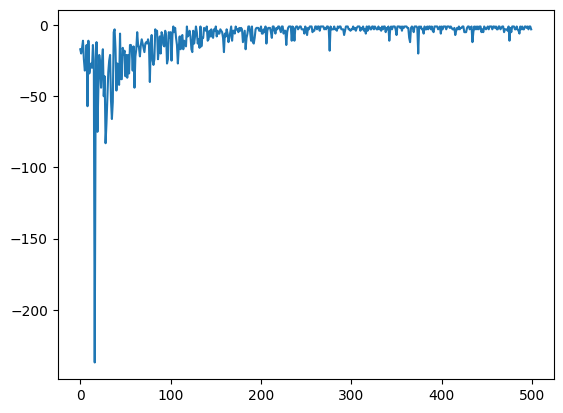

In [9]:
env = GridWorld(size=7, start=(0,0), end = (6,6),obstacles=[(1,1), (2,1), (2,2), (3, 3)])
q_agent = Q_Agent(env)
reward_per_episode = play(env, q_agent, trials=500)

plt.plot(reward_per_episode)



In [10]:
# find best path
best_path = find_best_path(q_agent, env)
print("最佳路徑:", best_path)


最佳路徑: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6)]


In [11]:
print(all_paths)

[(0, 0), (0, 1), (0, 1), (0, 2), (1, 2), (1, 3), (1, 2), (2, 2), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (2, 0), (3, 0), (2, 0), (2, 0), (1, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (2, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 2), (0, 2), (0, 1), (0, 1), (1, 1), (1, 0), (2, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 2), (0, 3), (0, 3), (1, 3), (0, 3), (0, 4), (0, 3), (0, 3), (1, 3), (2, 3), (2, 4), (2, 3), (3, 3), (1, 0), (2, 0), (2, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (2, 0), (3, 0), (3, 0), (4, 0), (3, 0), (3, 1), (2, 1), (0, 1), (0, 2), (0, 2), (1, 2), (1, 1), (0, 0), (1, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 0), (5, 0), (4, 0), (4, 1), (5, 1), (6, 1), (6, 0), (6, 1), (5, 1), (5, 2), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (5, 0), (5, 0), (5, 1), (4, 1), (4, 0), (3, 0), (2, 0), (2, 0), (3, 0), (3, 1), (3, 0), (3, 0),